# DM Couronne solaire

## Table des constantes de astropy
https://docs.astropy.org/en/stable/constants/

In [64]:
from astropy import constants as const

In [65]:
from astropy.constants import m_e,c,eps0,e,R_sun

In [66]:
from astropy import units as u

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Q 37 :  $\omega_p$

In [68]:
n0=1e14/(u.m)**3

In [69]:
omegap=np.sqrt(n0*e.si**2/m_e/eps0)

In [70]:
omegap=omegap*u.rad

In [71]:
omegap.decompose()

<Quantity 5.64146023e+08 rad / s>

In [72]:
nu=omegap.decompose()/(2*3.1415)

In [73]:
nu

<Quantity 89789276.31992084 rad / s>

# Q39 : densite

In [74]:
def logspace(start, stop, *args, **kwargs): 
     from astropy.units import LogQuantity, dex 
     if (not isinstance(start, LogQuantity) or 
             not isinstance(stop, LogQuantity)): 
         raise NotImplementedError 
  
     # Get unit from end point as for linspace. 
     stop = stop.to(dex(stop.unit.physical_unit)) 
     start = start.to(stop.unit) 
     unit = stop.unit.physical_unit 
     return (start.value, stop.value) + args, kwargs, unit, None 

In [75]:
from astropy.constants import R_sun,au

In [76]:
b=10
n0=1e14
N1=4e10

In [77]:
amax=np.log10(1.5*au/R_sun)
amax

<Quantity 2.50859467>

In [78]:
# distance normalisee en rayon solaire
# au : unite astronomique = distance terre-soleil
#r=np.linspace(1,1.5*au/R_sun,500)
r=np.logspace(0,2.5,100)

In [79]:
np.log10(1.5*au/R_sun)

<Quantity 2.50859467>

In [80]:
e.si**2/m_e/eps0

<Quantity 3182.607354 C2 m / (F kg)>

In [81]:
def ne(r):
    return np.exp(b/r)

In [82]:
# densite electronique en unite de N1
the_ne=ne(r)

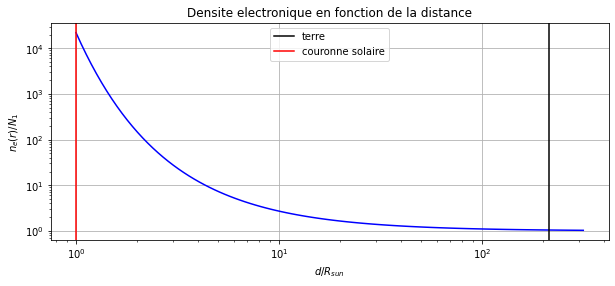

In [83]:
plt.figure(figsize=(10,4))
plt.semilogy(r,the_ne,'b-')
plt.xscale('log')
plt.ylabel("$n_e(r)/N_1$")
plt.xlabel("$d/R_{sun}$")
plt.title("Densite electronique en fonction de la distance")
plt.axvline(x=au/R_sun,color='k',label="terre")
plt.axvline(x=1,color='r',label="couronne solaire")
plt.grid()
plt.legend()

In [84]:
the_ne=the_ne*N1

In [85]:
def ve(ne,n0,omega):
    v=(1-ne/n0)/np.sqrt(1-ne*3182.6074/omega**2)
    return v

In [86]:
def ve_2(ne,n0,omega):
    v=np.where(ne<n0,(1-ne/n0),0)
    return v

In [87]:
nu=120

In [88]:
omega=nu*2*np.pi

In [89]:
the_ve=ve_2(the_ne,n0,omega)

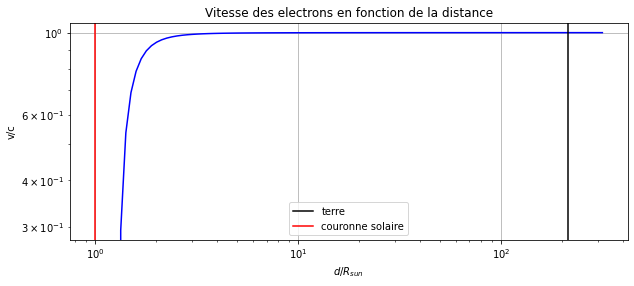

In [90]:
plt.figure(figsize=(10,4))
plt.semilogy(r,the_ve,'b-')
plt.xscale('log')
plt.ylabel("v/c")
plt.xlabel("$d/R_{sun}$")
plt.title("Vitesse des electrons en fonction de la distance")
plt.axvline(x=au/R_sun,color='k',label="terre")
plt.axvline(x=1,color='r',label="couronne solaire")
plt.grid()
plt.legend()

# Sursauts de type III

In [91]:
b=10
N1=4e10/(u.m)**3

### df/dt = 45 MHz/s

In [92]:
dfdt=(120-75)*1e6/u.s*u.Hz

In [93]:
dfdt

<Quantity 45000000. Hz / s>

### $\omega_p= 11.3$ MHz

In [94]:
omegap0=np.sqrt(1/(1*u.m)**3*e.si**2/m_e/eps0)

In [95]:
omegap0.decompose()

<Quantity 56.41460231 1 / s>

In [96]:
omegap=np.sqrt(N1*e.si**2/m_e/eps0)

In [97]:
omegap.decompose()

<Quantity 11282920.46236125 1 / s>

In [98]:
vpart=2*np.pi*R_sun*(2/b)*np.exp(-b/2)/omegap*dfdt

In [99]:
vpart.decompose()

<Quantity 23493647.32190908 m / s>

In [100]:
(vpart/c).decompose()

<Quantity 0.07836637>